In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-08-26 / Aki Taanila


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Kolikon heittoa

Simuloin kolikon heittoa miljoona kertaa tuottamalla sattumanvaraisesti nollia ja ykkösiä. Tulokset tallennan heitot-nimiseen muuttujaan.

In [3]:
# Alustan satunnaislukugeneraattorin:
rng = np.random.default_rng()

heitot = rng.integers(low=0, high=2, size=1000000)

print(f'Kruunuja: {np.sum(heitot)}, Klaavoja: {np.sum(1 - heitot)}')

Kruunuja: 500599, Klaavoja: 499401


Muodostan listan, joka kertoo kuinka monta kertaa sama tulos tulee peräkkäin. Jos esimerkiksi tulee kolme klaavaa, sitten yksi kruunu ja sen jälkeen neljä klaavaa, niin listaan tulee 3, 1, 4. Listan nimeksi annan sarjat.

In [4]:
sarjat = []
sarja = 1

for i in range(len(heitot) - 1):
    if heitot[i] == heitot[i + 1]:
        sarja += 1
    else:
        sarjat.append(sarja)
        sarja = 1
sarjat.append(sarja)

Lasken sarjat-listassa esiintyvien lukujen lukumäärät. Kuten huomaat, niin jopa yli kymmenen peräkkäisen kruunun tai klaavan sarjoja on melko paljon.

In [5]:
from collections import Counter

laskuri = Counter(sarjat)

pd.DataFrame(data = Counter(laskuri).values(), index = Counter(laskuri).keys(), columns = ['lkm']).sort_index()

,lkm
1,249690
2,125178
3,62348
4,31468
5,15625
6,7771
7,3938
8,1892
9,990
10,461


## Kahden nopan heittoa

Seuraavassa heitän kahta noppaa tuhat kertaa ja tallennan tulokset heitot-nimiseen muuttujaan.

Lasken eri silmälukujen määrät kummallekin nopalle ja parien määrät.

In [6]:
# Kahden nopan heittoa 1000 kertaa
heitot = rng.integers(low=1, high=7, size=(1000, 2))

# dataframe tulosten esittämistä varten
tulokset = pd.DataFrame(columns = ['eka', 'toka', 'pareja'])

# for silmukka käy läpi silmälukujen arvot 1 - 6
for i in range(1, 7):
    eka = heitot[:,0] == i # ensimmäinen noppa
    toka = heitot[:,1] == i # toinen noppa
    pareja = eka & toka # pari (molemmilla sama tulos)
    
    # Lisätään silmälukuun liittyvät lukumäärät dataframeen
    tulokset_uusi_rivi = pd.DataFrame({'eka' : eka.sum(), 
            'toka' : toka.sum(), 'pareja' : pareja.sum()}, index = [i])
    tulokset = pd.concat([tulokset, tulokset_uusi_rivi])

tulokset.index.name = 'Silmäluku'
tulokset

,eka,toka,pareja
Silmäluku,,,
1,168,172,32
2,170,169,38
3,170,160,31
4,180,188,35
5,149,161,19
6,163,150,26


Esitän lopuksi kahden nopan silmälukujen summan jakauman

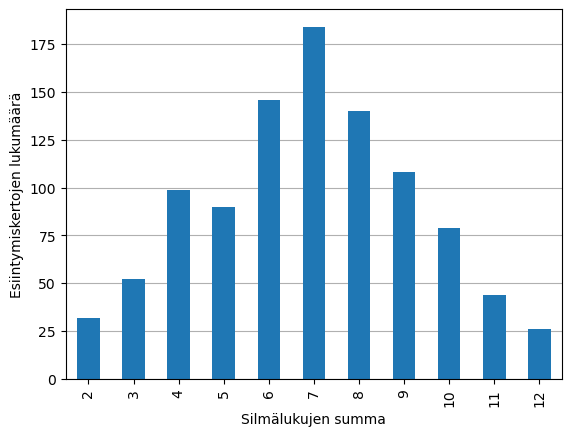

In [7]:
df = pd.DataFrame(heitot)
df['sum'] = df.sum(axis=1)

ax = df['sum'].value_counts().sort_index().plot.bar()
ax.set_xlabel('Silmälukujen summa')
ax.set_ylabel('Esiintymiskertojen lukumäärä')
ax.grid(axis = 'y')
ax.set_axisbelow(True)

Lisätietoa satunnaislukujen tuottamisesta: https://numpy.org/doc/stable/reference/random/index.html